In [197]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

In [198]:
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pip install seaborn
import seaborn as sns
sns.set_style('whitegrid')


SyntaxError: invalid syntax (<ipython-input-198-09448e865c09>, line 5)

In [199]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [232]:
titanic_df = pd.read_csv("C:/Users/jimfeter/Downloads/train.csv")
test = pd.read_csv("C:/Users/jimfeter/Downloads/test.csv")

In [201]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [203]:
titanic_df = titanic_df.drop(["Ticket", "Name", "PassengerId"], axis = 1)
test = test.drop(["Name", "Ticket"], axis= 1)

In [204]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [205]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")

In [206]:
embarky = titanic_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean()

In [207]:
embarky.head()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [208]:
embarked_dummies = pd.get_dummies(titanic_df['Embarked'])
embarked_dummies.drop(['S'], axis = 1, inplace = True)

In [209]:
embarked_dummies2 = pd.get_dummies(test['Embarked'])
embarked_dummies2.drop(['S'], axis = 1, inplace = True)

In [210]:
embarked_dummies2.head()

,C,Q
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


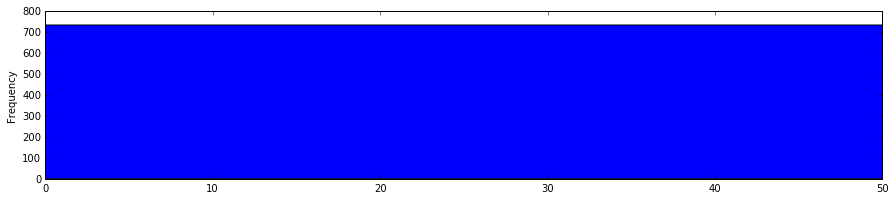

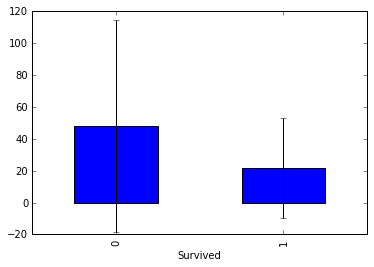

In [211]:
#fare. There is a value missing for the fare column 
test['Fare'].fillna(test['Fare'].median(), inplace = True)

#change type from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

#The fare for those whom survived and didn't survive
fare_survive = titanic_df['Fare'][titanic_df['Survived'] == 1]
fare_didnt_survive = titanic_df['Fare'][titanic_df['Survived'] == 0]

#Get average fare and sd 

mean_fare = DataFrame([fare_survive.mean(), fare_didnt_survive.mean()])
std_fare = DataFrame([fare_survive.std(), fare_didnt_survive.std()])

#plot
titanic_df['Fare'].plot(kind = 'hist',figsize= (15,3), bins = 10, xlim= (0,50) )
mean_fare.index.names = std_fare.index.names = ["Survived"]
mean_fare.plot(yerr=std_fare,kind='bar',legend=False)


In [212]:
mean_fare.head()

,0
Survived,
0,47.991228
1,21.690346


In [213]:
mean_fare.index.names = std_fare.index.names = ["Survived"]

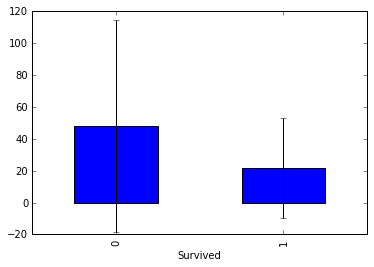

In [214]:
mean_fare.plot(yerr = std_fare, kind = 'bar', legend = False)

In [233]:
average_age = titanic_df['Age'].mean()
std_age_ = titanic_df['Age'].std()
count_na_titanic = titanic_df['Age'].isnull().sum()

average_aget_ = test['Age'].mean()
std_aget_ = test['Age'].std()
count_nat_ = test['Age'].isnull().sum()

In [234]:
rand1 = np.random.randint(average_age - std_age_, average_age + std_age_, size = count_na_titanic)
rand2 = np.random.randint(average_aget_ - std_aget_, average_aget_ + std_aget_, size = count_nat_)

In [235]:
len(rand1)

177

In [236]:
titanic_df['Age'].isnull().sum()

177

In [237]:
titanic_df['Age'] = titanic_df['Age'].astype(float)
test['Age'] = test['Age'].astype(float)

C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


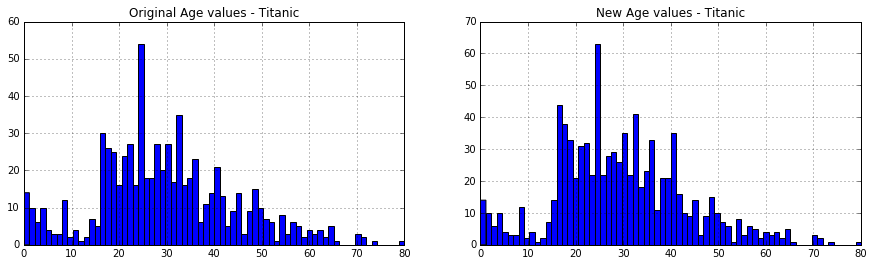

In [238]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')
#original values
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand1
test["Age"][np.isnan(test["Age"])] = rand2
#convert to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
#plot new values
titanic_df["Age"].hist(bins = 70, ax =axis2)

In [254]:
#Parch + Sibsp = Family. Does this increase chances of survival

titanic_df['Family'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test['Family'] = test['Parch'] + test['SibSp']
test['Family'].loc[test["Family"]> 0] = 1
test['Family'].loc[test["Family"] == 0] = 0

titanic_df.drop(["Parch", "SibSp"], axis= 1, inplace =True)
test.drop(["Parch", "SibSp"], axis= 1, inplace =True)


C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [260]:
#Person column. Children == somoene under the age of 16. More likely to survive 

def get_person(passenger):
    Age, Sex = passenger
    return 'Child' if Age < 16 else Sex

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(get_person, axis = 1)
test['Person'] = test[['Age', 'Sex']].apply(get_person, axis = 1)


titanic_df.drop(['Age','Sex'], axis = 1, inplace = True)
test.drop(['Age', 'Sex'], axis = 1, inplace = True)

#create dummy variables. Drop Male since they have lowest chance of surviving
titanic_df_person_dum = pd.get_dummies(titanic_df['Person'])
titanic_df_person_dum.columns('Child', 'Female', 'Male')
titanic_df_person_dum.drop('Male')

test_person_dum = pd.get_dummies(test['Person'])
test_person_dum.columns('Child', 'Female', 'Male')
test_person.drop('Male')

titanic_df.join(titanic_df_person_dum)
test.join(test_person_dum)


KeyError: "['Age' 'Sex'] not in index"

In [262]:
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test_  = pd.get_dummies(test['Pclass'])
pclass_dummies_test_.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test_.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test.join(pclass_dummies_test_)

KeyError: 'Pclass'

In [ ]:
X_train = titanic_df.drop('Survived', axis =1)
Y_train = titanic_df['Survived']
X_test = test.drop("PassengerClass", axis =1).copy()

In [ ]:
LogisticRegression.fit(X_train, Y_train)
Y_Pred =LogsiticRegression.predict(X_test)
LogisticRegression.score(X_train, Y_train)